In [ ]:
import numpy as np

# Crear una grid 2D 10x10
grid = np.zeros((10, 10))

# Añadir algunos obstáculos
grid[1:3, 2:4] = 1
grid[6:8, 7:9] = 1


In [2]:
import heapq

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), 0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}
    
    while open_set:
        _, _, current = heapq.heappop(open_set)
        
        if current == goal:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path
        
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if (0 <= neighbor[0] < grid.shape[0] and
                0 <= neighbor[1] < grid.shape[1] and
                grid[neighbor[0], neighbor[1]] == 0):
                
                new_cost = cost_so_far[current] + 1
                
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (priority, new_cost, neighbor))
                    came_from[neighbor] = current
                    
    return None  # No se encontró un camino

# Definir los puntos de inicio y meta
start = (0, 0)
goal = (9, 9)

# Encontrar el camino
path = astar(grid, start, goal)
print(path)


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


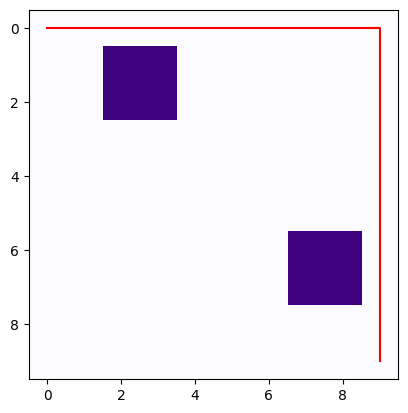

In [3]:
import matplotlib.pyplot as plt

def visualize_path(grid, path):
    fig, ax = plt.subplots()
    
    # Dibujar la grilla
    ax.imshow(grid, cmap='Purples')
    
    # Dibujar el camino
    if path is not None:
        path_y, path_x = zip(*path)
        ax.plot(path_x, path_y, c='red')
    
    plt.show()

# Visualizar el resultado
visualize_path(grid, path)
